<a href="https://colab.research.google.com/github/realyou0312/DeepLearning/blob/main/Kaggle_Plant2020_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob

import numpy as np
import scipy as sp
import pandas as pd

# skimage
from skimage.io import imshow, imread, imsave
from skimage.transform import rotate, AffineTransform, warp,rescale, resize, downscale_local_mean
from skimage import color,data
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

#OpenCV-Python
import cv2

# imgaug
import imageio
import imgaug as ia
import imgaug.augmenters as iaa

# Albumentations
import albumentations as A

# Augmentor
!pip install augmentor
import Augmentor 

# Keras
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img 

# SOLT
!pip install solt
import solt
import solt.transforms as slt

#visualisation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from IPython.display import HTML, Image

#source: https://www.kaggle.com/jpmiller/nfl-punt-analytics/edit
# set additional display options for report
pd.set_option("display.max_columns", 100)
th_props = [('font-size', '13px'), ('background-color', 'white'), 
            ('color', '#666666')]
td_props = [('font-size', '15px'), ('background-color', 'white')]
styles = [dict(selector="td", props=td_props), dict(selector="th", 
            props=th_props)]

#warnings
import warnings
warnings.filterwarnings("ignore")


#Helper function to display the images in a grid
# Source: https://stackoverflow.com/questions/42040747/more-idiomatic-way-to-display-images-in-a-grid-with-numpy which was pointed by
# this excellent article: https://towardsdatascience.com/data-augmentation-for-deep-learning-4fe21d1a4eb9
def gallery(array, ncols=3):
    '''
    Function to arange images into a grid.
    INPUT:
        array - numpy array containing images
        ncols - number of columns in resulting imahe grid
    OUTPUT:
        result - reshaped array into a grid with given number of columns
    '''
    nindex, height, width, intensity = array.shape
    nrows = nindex//ncols
    assert nindex == nrows*ncols
    result = (array.reshape(nrows, ncols, height, width, intensity)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols, intensity))
    return result

     |████████████████████████████████| 38.2MB 102kB/s 
  Created wheel for solt: filename=solt-0.1.9-cp37-none-any.whl size=26387 sha256=28bb4f99e5943c61831fa78c47390585fc744658dc340b76f3e1e9f83adebb56
  Stored in directory: /root/.cache/pip/wheels/60/18/8d/dcd33107253ee1e4ca336f28b4f54b4ef58522e6f19b1f20f1
Successfully built solt


In [ ]:
Image_Data_Path = "/content/drive/MyDrive/Kaggle_Plant2020/images/"

train_data = pd.read_csv("/content/drive/MyDrive/Kaggle_Plant2020/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Kaggle_Plant2020/test.csv")

def load_image(image_id):
    file_path = image_id + ".jpg"
    image = imread(Image_Data_Path + file_path)
    return image

train_images = train_data["image_id"][:50].apply(load_image)

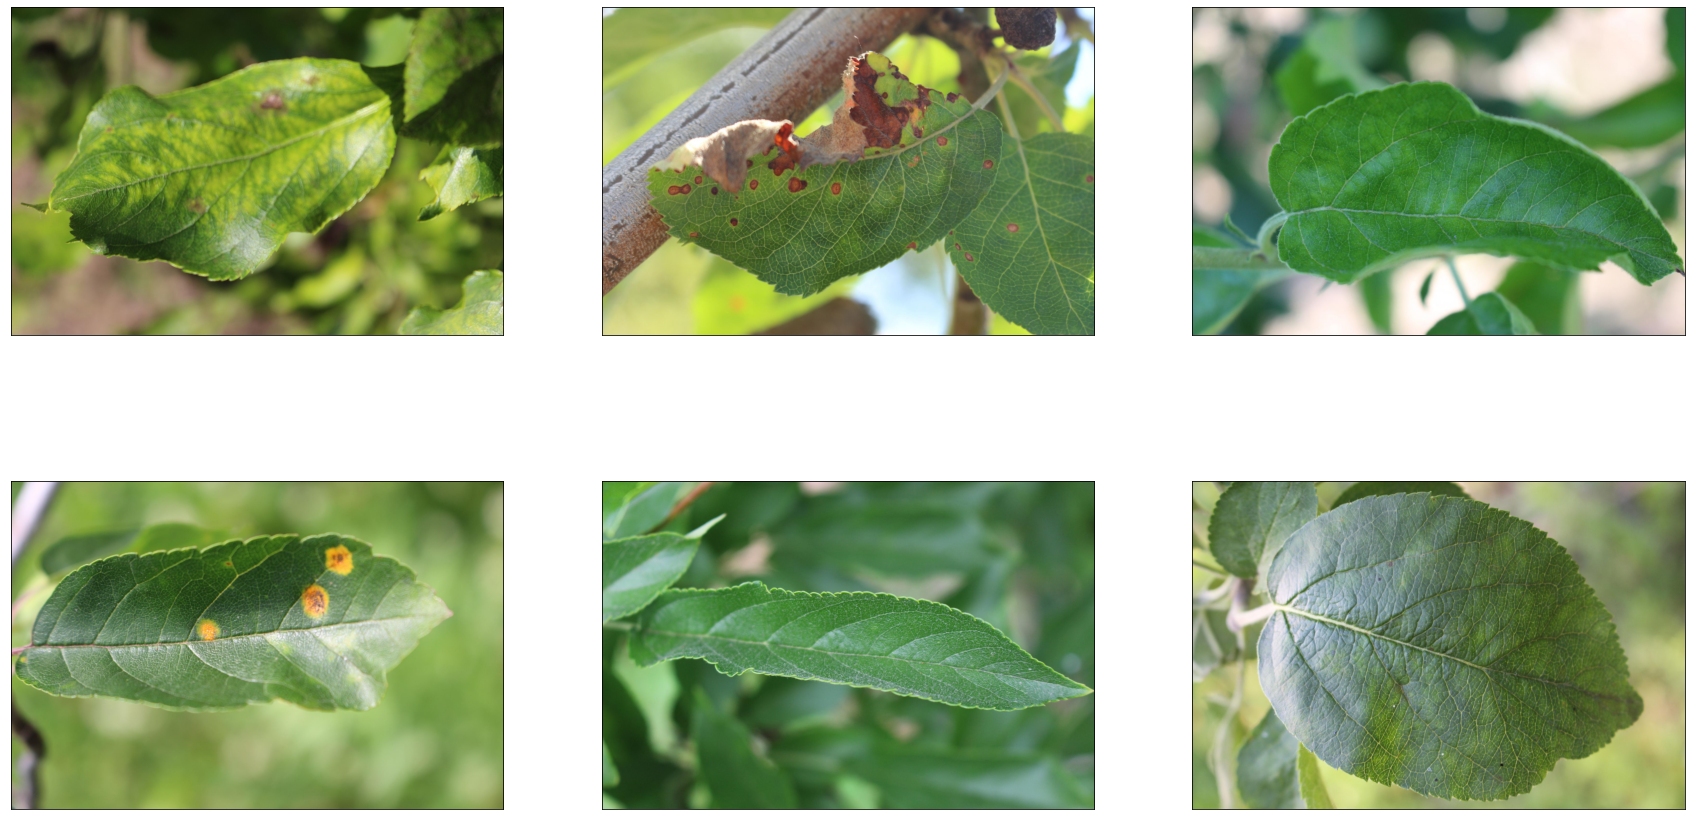

In [ ]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(30,16))
for col in range(3):
    for row in range(2):
        ax[row,col].imshow(train_images.loc[train_images.index[row*3+col]])
        #ax[row,col].set_title(image_titles[i])    
        ax[row,col].set_xticks([])
        ax[row,col].set_yticks([])

(1365, 2048, 3)


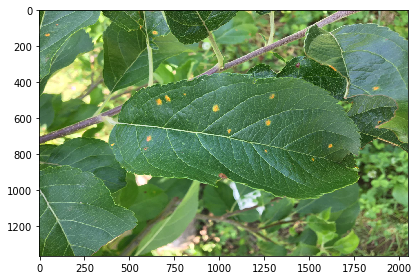

In [ ]:
image = train_images[15]
imshow(image)
print(image.shape)

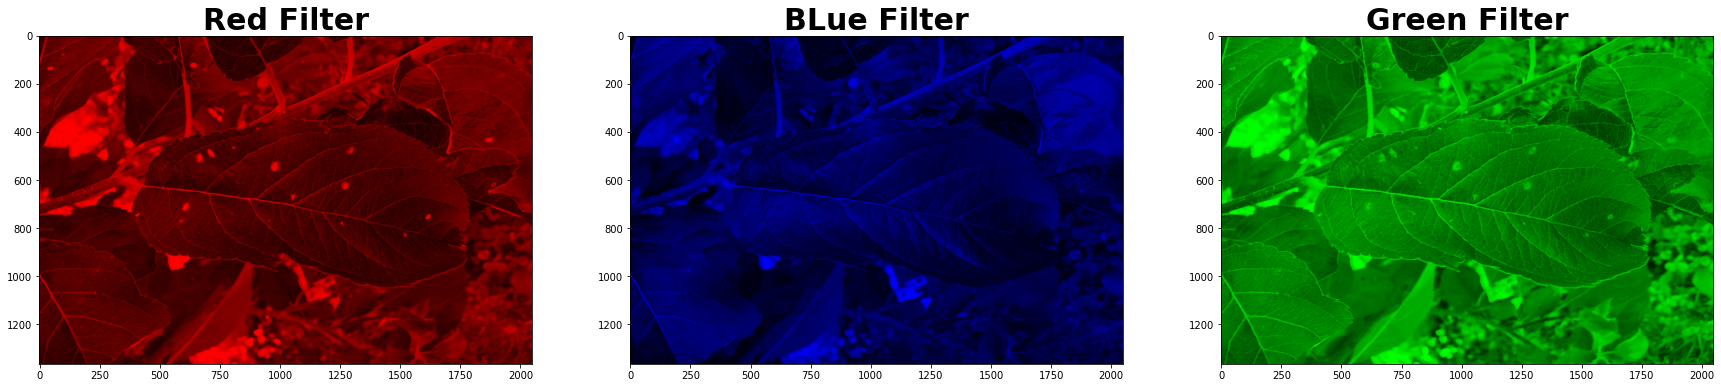

In [ ]:
# red filter [R,G,B]
red_filter = [1,0,0]
# blue filter
blue_filter = [0,0,1]
# green filter
green_filter = [0,1,0]


# matplotlib code to display
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(30,16))
ax[0].imshow(image*red_filter)
ax[0].set_title("Red Filter",fontweight="bold", size=30)
ax[1].imshow(image*blue_filter)
ax[1].set_title("BLue Filter",fontweight="bold", size=30)
ax[2].imshow(image*green_filter)
ax[2].set_title("Green Filter",fontweight="bold", size=30);

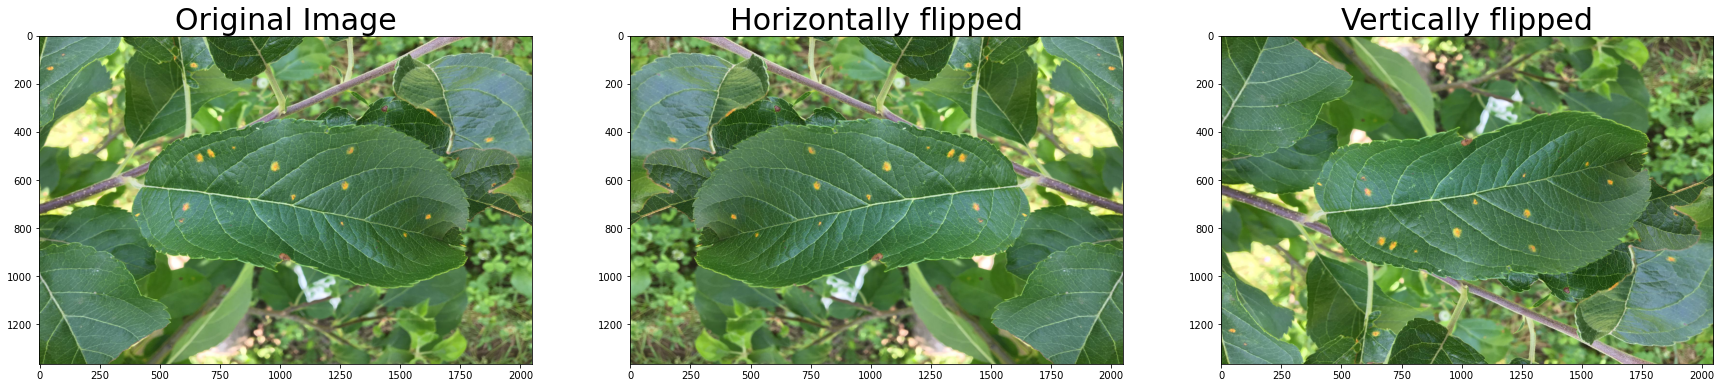

In [ ]:
#Horizontally flipped
hflipped_image= np.fliplr(image) #fliplr reverse the order of columns of pixels in matrix

#Vertically flipped
vflipped_image= np.flipud(image) #flipud reverse the order of rows of pixels in matrix

fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(30,16))
ax[0].imshow(image)
ax[0].set_title("Original Image", size=30)
ax[1].imshow(hflipped_image)
ax[1].set_title("Horizontally flipped", size=30)
ax[2].imshow(vflipped_image)
ax[2].set_title("Vertically flipped", size=30);

In [ ]:
# clockwise rotation
rot_clockwise_image = rotate(image, angle=45) 
# Anticlockwise rotation
rot_anticlockwise_image = rotate(image, angle=-45)

In [ ]:
# source: https://www.kaggle.com/safavieh/image-augmentation-using-skimage
import random
import pylab as pl 
def randRange(a, b):
    '''
    a utility function to generate random float values in desired range
    '''
    return pl.rand() * (b - a) + a
def randomCrop(im):
    '''
    croping the image in the center from a random margin from the borders
    '''
    margin = 1/3.5
    start = [int(randRange(0, im.shape[0] * margin)),
             int(randRange(0, im.shape[1] * margin))]
    end = [int(randRange(im.shape[0] * (1-margin), im.shape[0])), 
           int(randRange(im.shape[1] * (1-margin), im.shape[1]))]
    cropped_image = (im[start[0]:end[0], start[1]:end[1]])
    return cropped_image

Text(0.5, 1.0, 'Cropped')

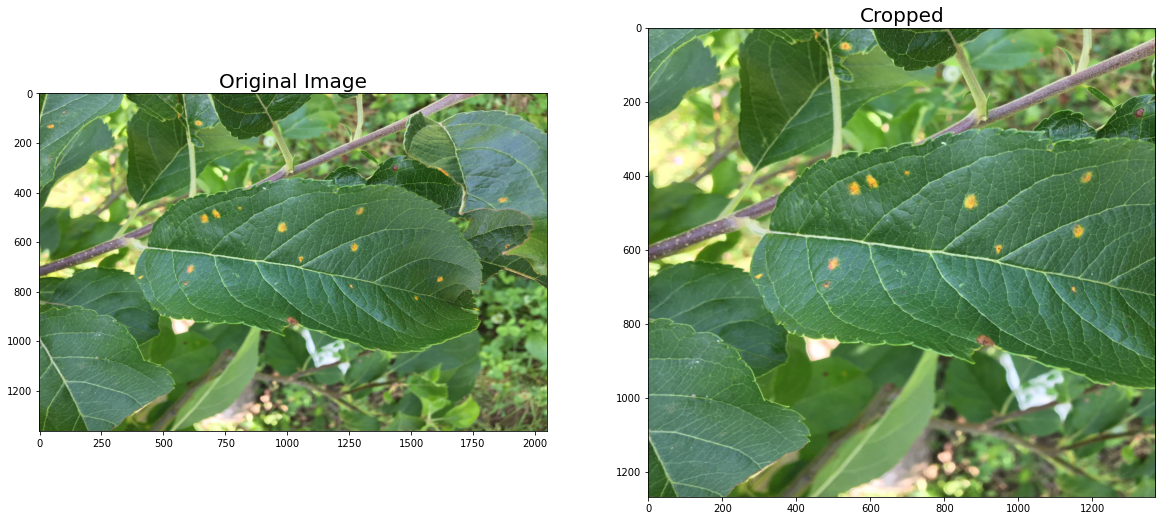

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,12))
ax[0].imshow(image)
ax[0].set_title("Original Image", size=20)
ax[1].imshow(randomCrop(image))
ax[1].set_title("Cropped", size=20)

In [ ]:
image_bright = adjust_gamma(image, gamma=0.5,gain=1)
image_dark = adjust_gamma(image, gamma=2,gain=1)

Text(0.5, 1.0, 'Darkened Image')

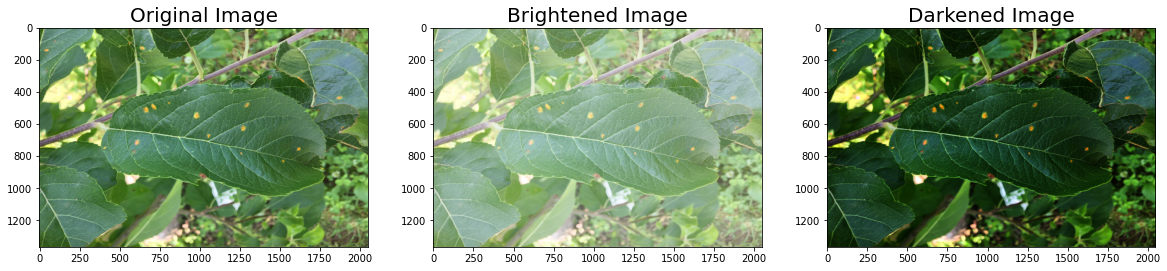

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(20,12))
ax[0].imshow(image)
ax[0].set_title("Original Image", size=20)
ax[1].imshow(image_bright)
ax[1].set_title("Brightened Image", size=20)
ax[2].imshow(image_dark)
ax[2].set_title("Darkened Image", size=20)

In [ ]:
image_resized = resize(image, (image.shape[0] // 2, image.shape[1] // 2),
                       anti_aliasing=True)
#image_downscaled = downscale_local_mean(image, (4, 3))

Text(0.5, 1.0, 'Resized image')

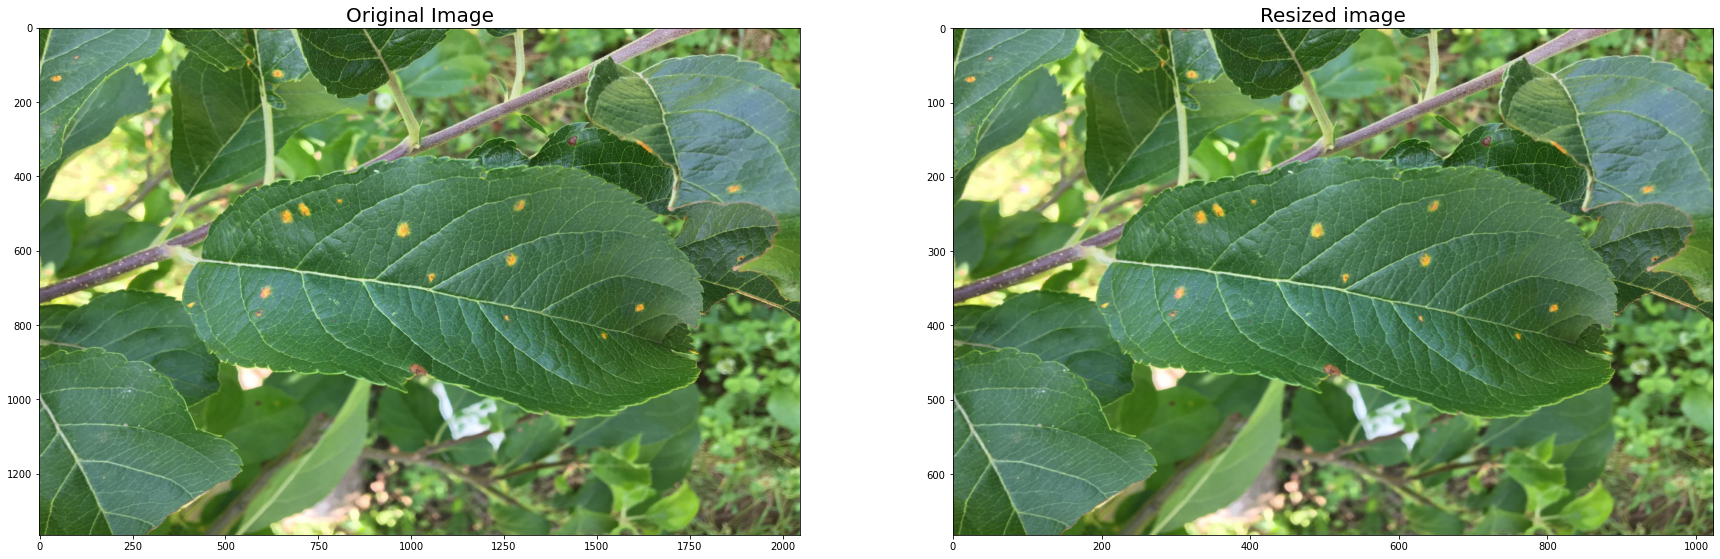

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(30,16))
ax[0].imshow(image)
ax[0].set_title("Original Image", size=20)
ax[1].imshow(image_resized)
ax[1].set_title("Resized image",size=20)